In [9]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_outlier_stat(stats, stat_key='ratio', ax=None, title=None):
    """
    Plot outlier ratio of every channel
    """
    outlier_stat = stats[stat_key].numpy()
    channels = np.arange(len(outlier_stat))

    # check nan or inf in outlier_stat
    # print(f"average {stat_key}: {outlier_stat.mean()}")
    # print(f"nan: {np.isnan(outlier_stat).any()}")
    # print(f"inf: {np.isinf(outlier_stat).any()}")

    if 'l2_norm' in stat_key:
        outlier_stat = np.log10(outlier_stat)
        # set -inf to inf
        outlier_stat[np.isinf(outlier_stat)] = np.inf
        outlier_stat -= outlier_stat.min()
        # set inf to 0
        outlier_stat[np.isinf(outlier_stat)] = 0

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(channels, outlier_stat, 'o', label=f'outlier_{stat_key}', markersize=1, color='red')

    # plot lines
    line_colors = ['blue', 'magenta', 'brown', 'black']
    for i in range(len(channels)):
        ax.plot([channels[i], channels[i]], [0, outlier_stat[i]], '-', linewidth=0.5, alpha=0.2, color=line_colors[i % len(line_colors)])

    # ax.bar(channels, outlier_stat, label=f'outlier_{stat_key}', color='red', alpha=0.5, width=1)

    ax.set_title(title)
    ax.legend()

def plot_outlier_all_stats(layer_stats, module_name=None):
    """
    Plot stat in a subgraph
    """
    num_subplots = 6
    fig, axs = plt.subplots(1, num_subplots, figsize=(5*num_subplots, 5))
    fig.suptitle(module_name)

    for i, (category, stats) in enumerate(layer_stats.items()):
        title = f"{category} channel outlier ratio"
        plot_outlier_stat(stats, stat_key='ratio', ax=axs[i * 3], title=title)
        title = f"{category} channel outlier l2 norm"
        plot_outlier_stat(stats, stat_key='l2_norm', ax=axs[i * 3 + 1], title=title)
        title = f"{category} channel outlier all l2 norm"
        plot_outlier_stat(stats, stat_key='all_l2_norm', ax=axs[i * 3 + 2], title=title)

    plt.show()

In [10]:
outlier_stats = torch.load('act_stats/opt-6.7b_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    if int(module_name.split('.')[3]) > 0:
        break
    print(module_name)

model.decoder.layers.0.self_attn_layer_norm
model.decoder.layers.0.self_attn.q_proj
model.decoder.layers.0.self_attn.k_proj
model.decoder.layers.0.self_attn.v_proj
model.decoder.layers.0.self_attn.qkt_matmul
model.decoder.layers.0.self_attn.pv_matmul
model.decoder.layers.0.self_attn.out_proj
model.decoder.layers.0.final_layer_norm
model.decoder.layers.0.fc1
model.decoder.layers.0.fc2


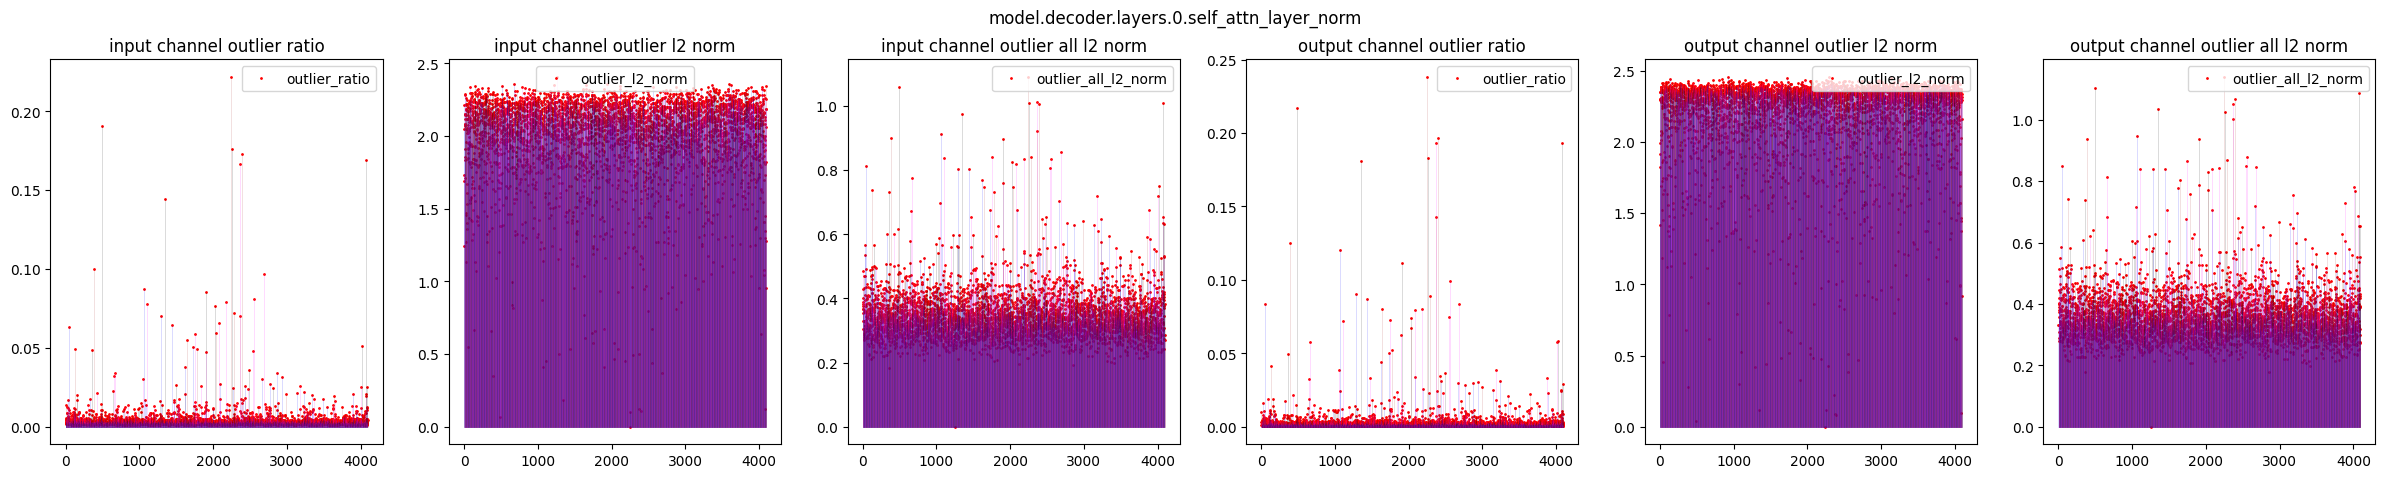

/tmp/ipykernel_7930/1678317626.py:19: RuntimeWarning: divide by zero encountered in log10
  outlier_stat = np.log10(outlier_stat)


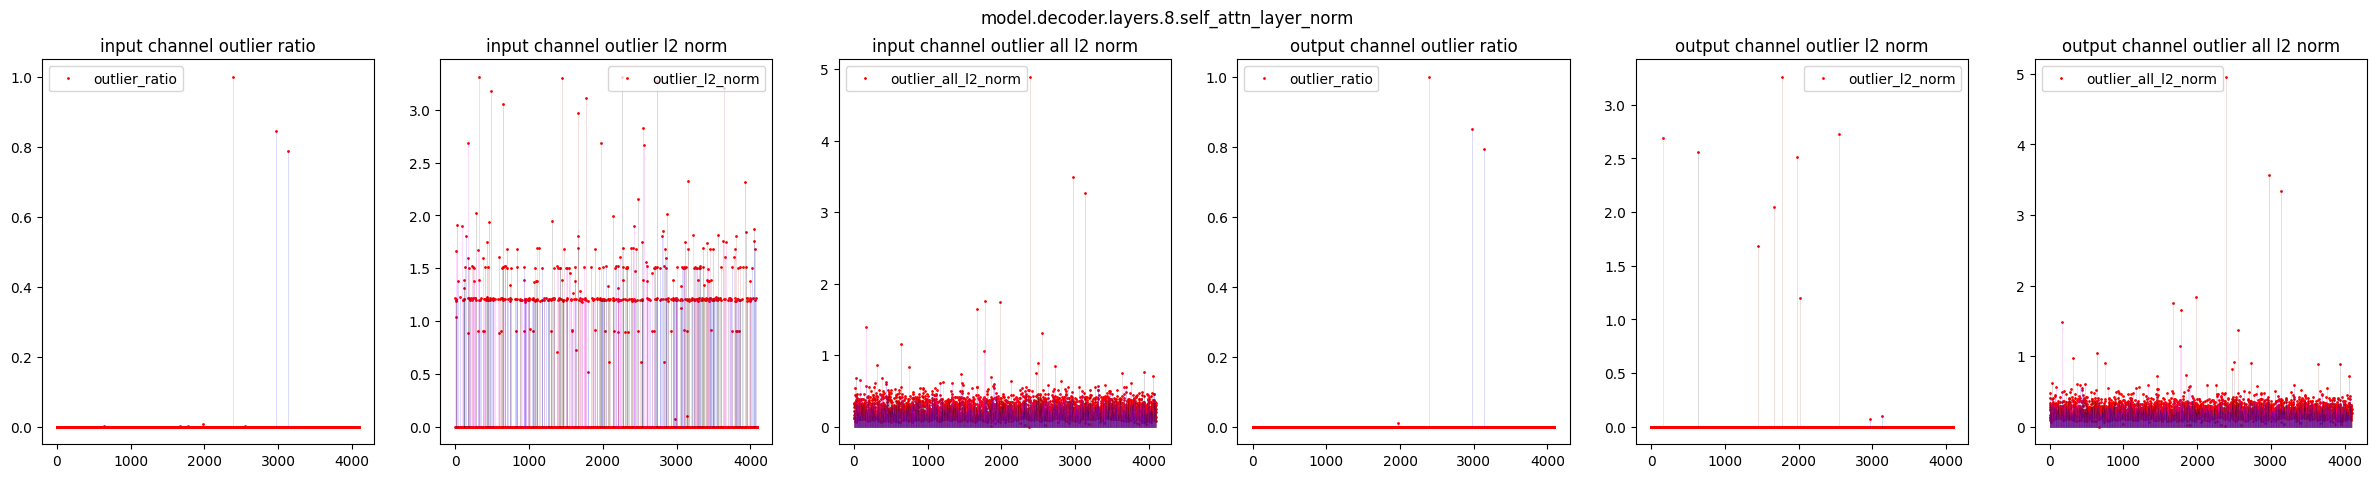

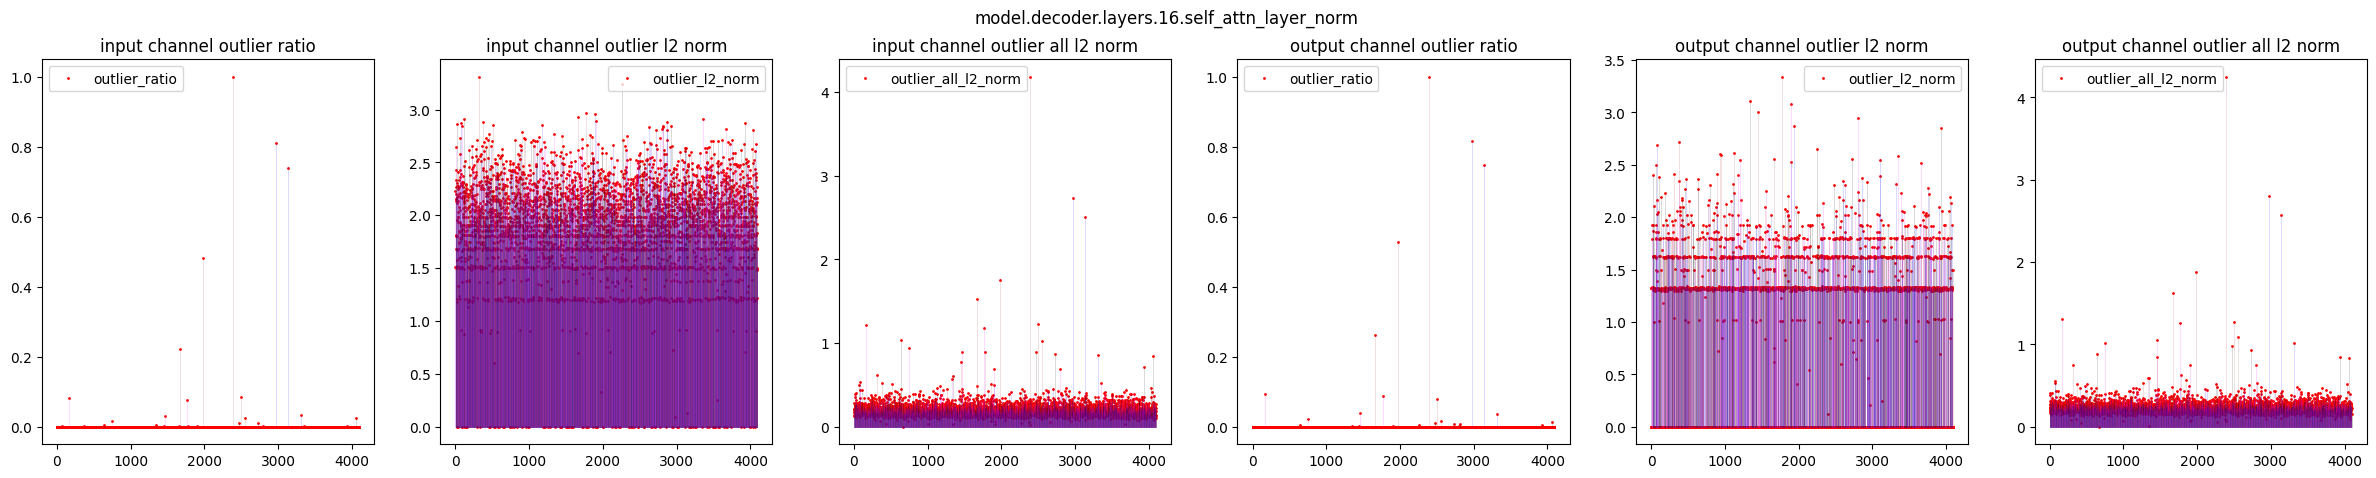

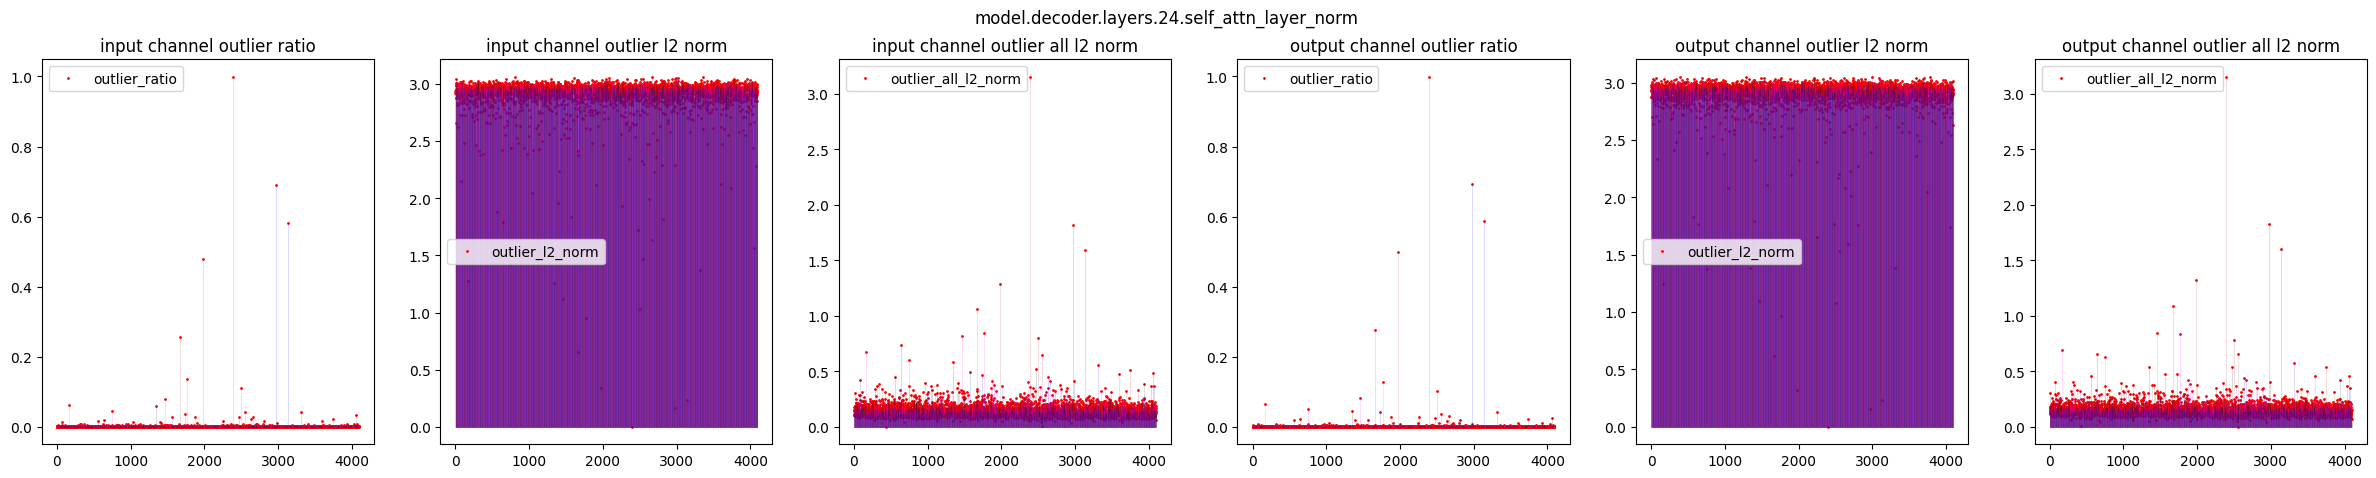

In [11]:
outlier_stats = torch.load('act_stats/opt-6.7b_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    # only examine layernorm
    if 'self_attn_layer_norm' not in module_name:
        continue
    # check every 4 layers
    if int(module_name.split('.')[3]) % 8 != 0:
        continue

    plot_outlier_all_stats(layer_stats, module_name=module_name)

/tmp/ipykernel_7930/1678317626.py:19: RuntimeWarning: divide by zero encountered in log10
  outlier_stat = np.log10(outlier_stat)


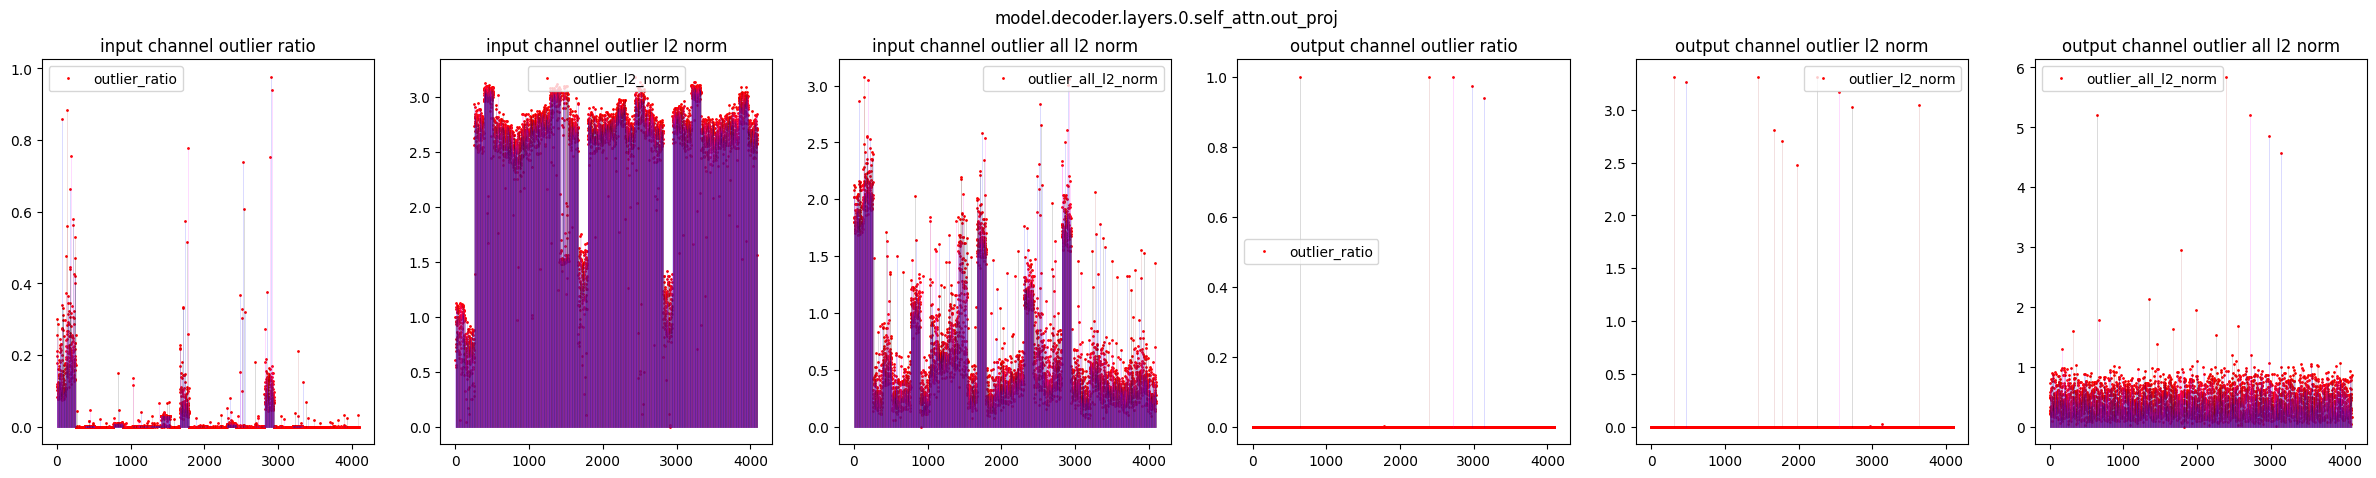

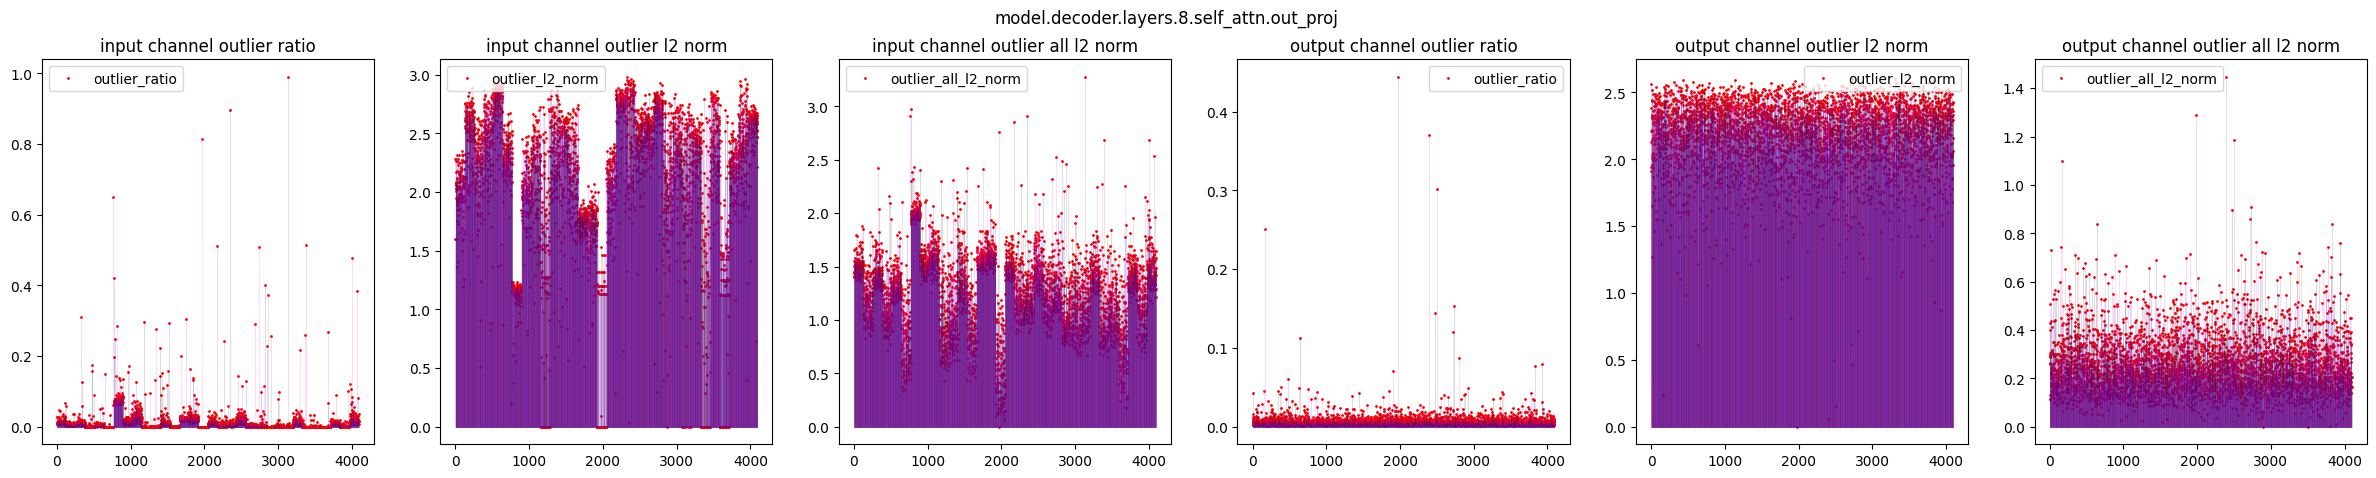

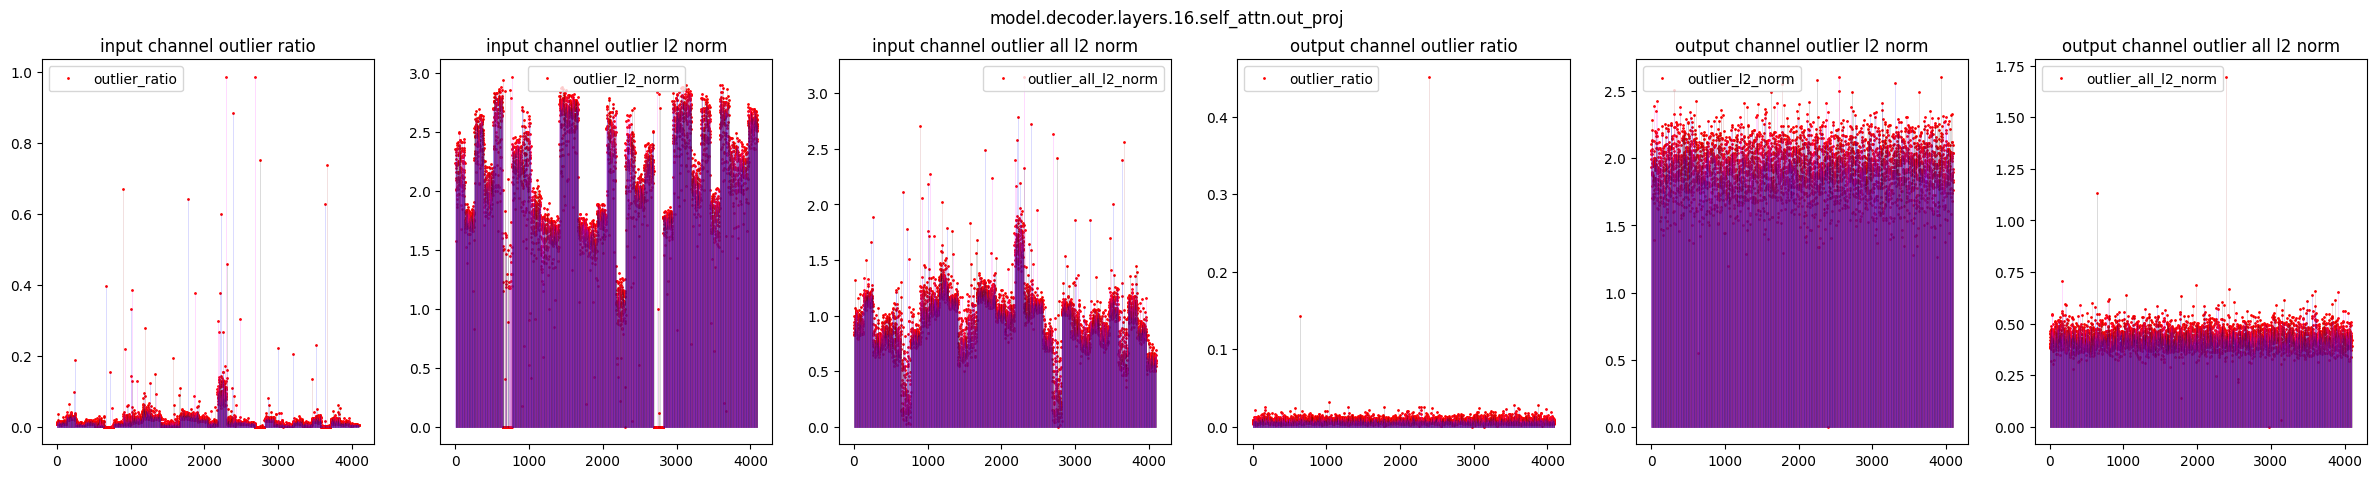

/home/xuechenhao/anaconda3/envs/omniquant/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


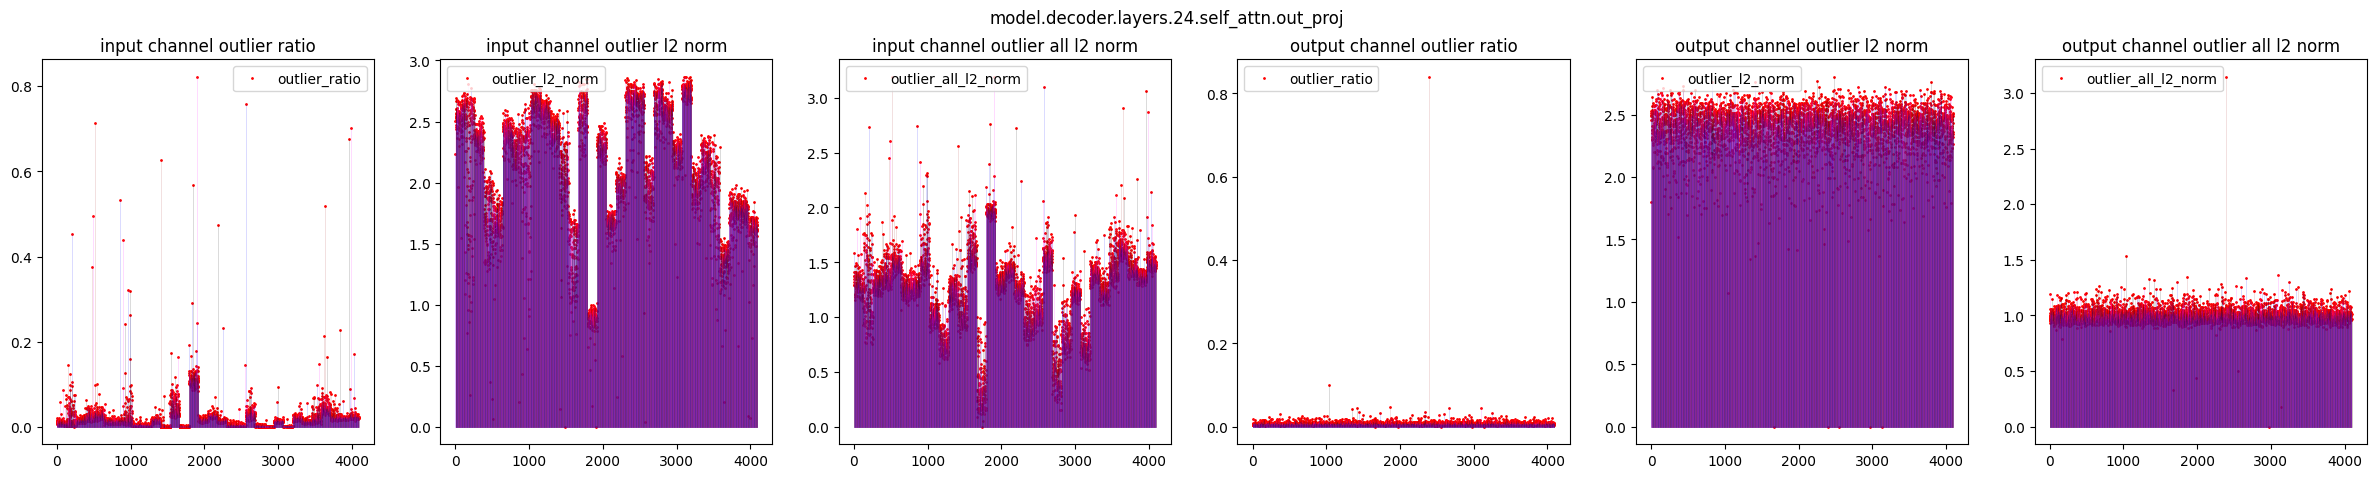

In [12]:
outlier_stats = torch.load('act_stats/opt-6.7b_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    # only examine layernorm
    if 'out_proj' not in module_name:
        continue
    # check every 4 layers
    if int(module_name.split('.')[3]) % 8 != 0:
        continue

    plot_outlier_all_stats(layer_stats, module_name=module_name)

/tmp/ipykernel_7930/1678317626.py:19: RuntimeWarning: divide by zero encountered in log10
  outlier_stat = np.log10(outlier_stat)


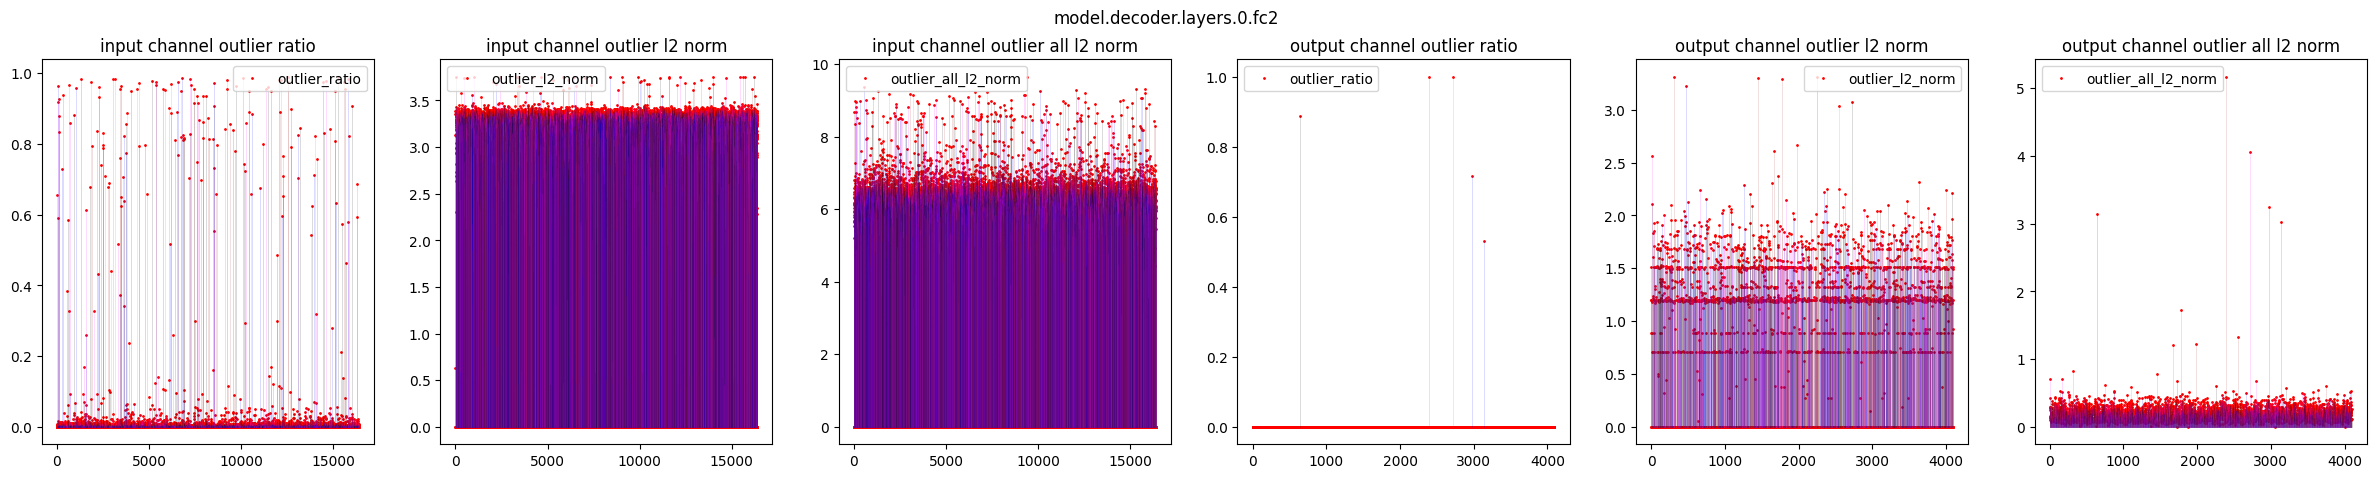

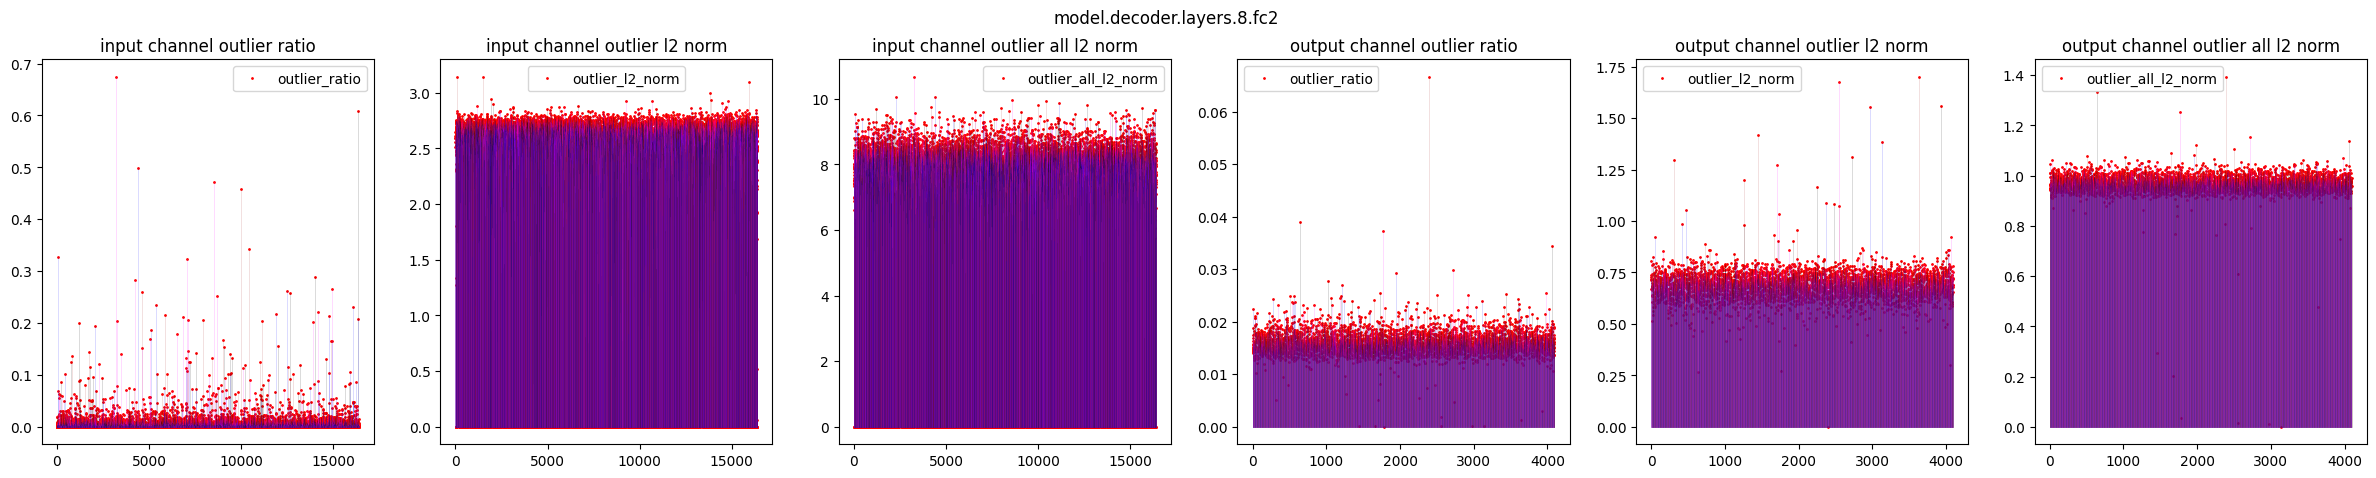

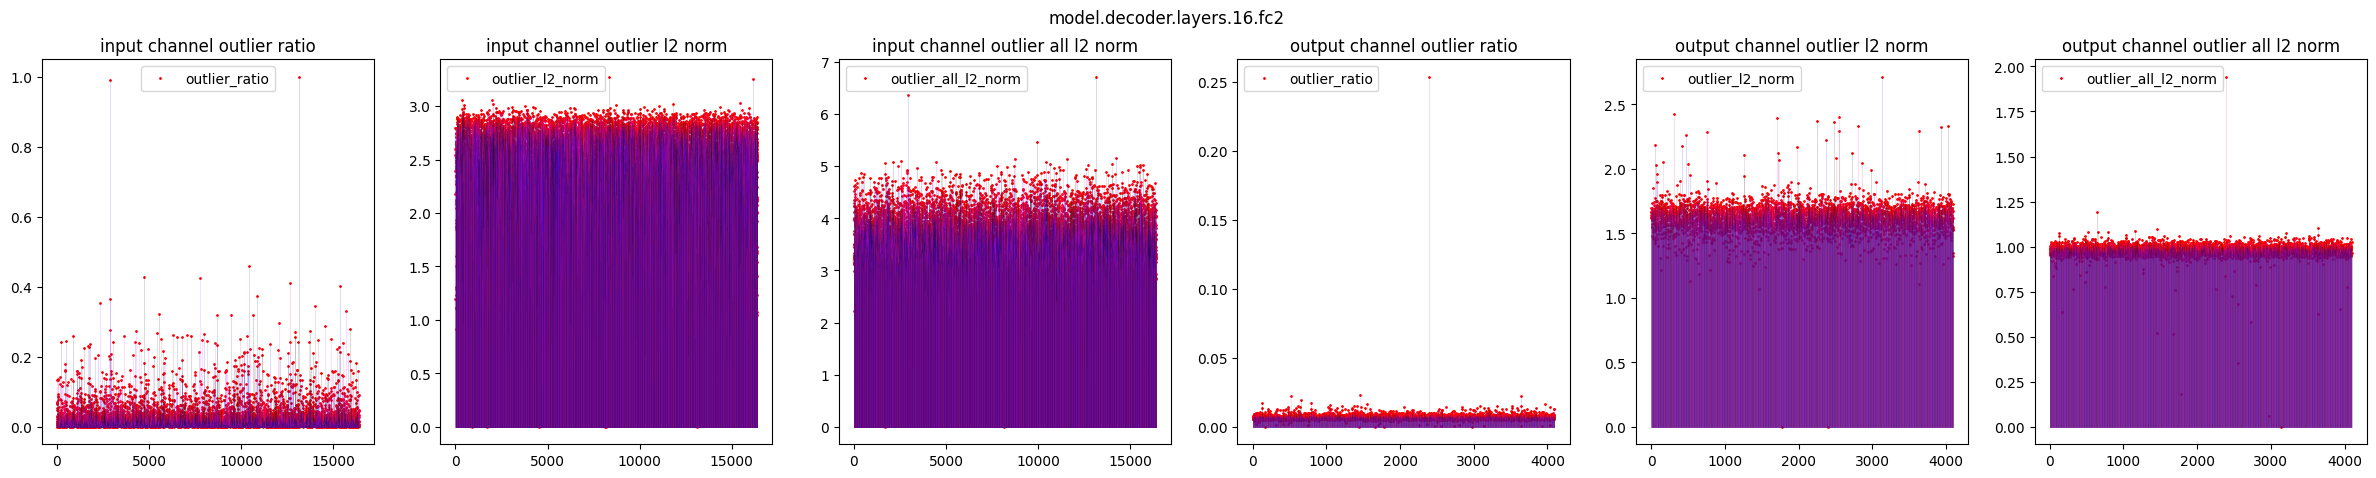

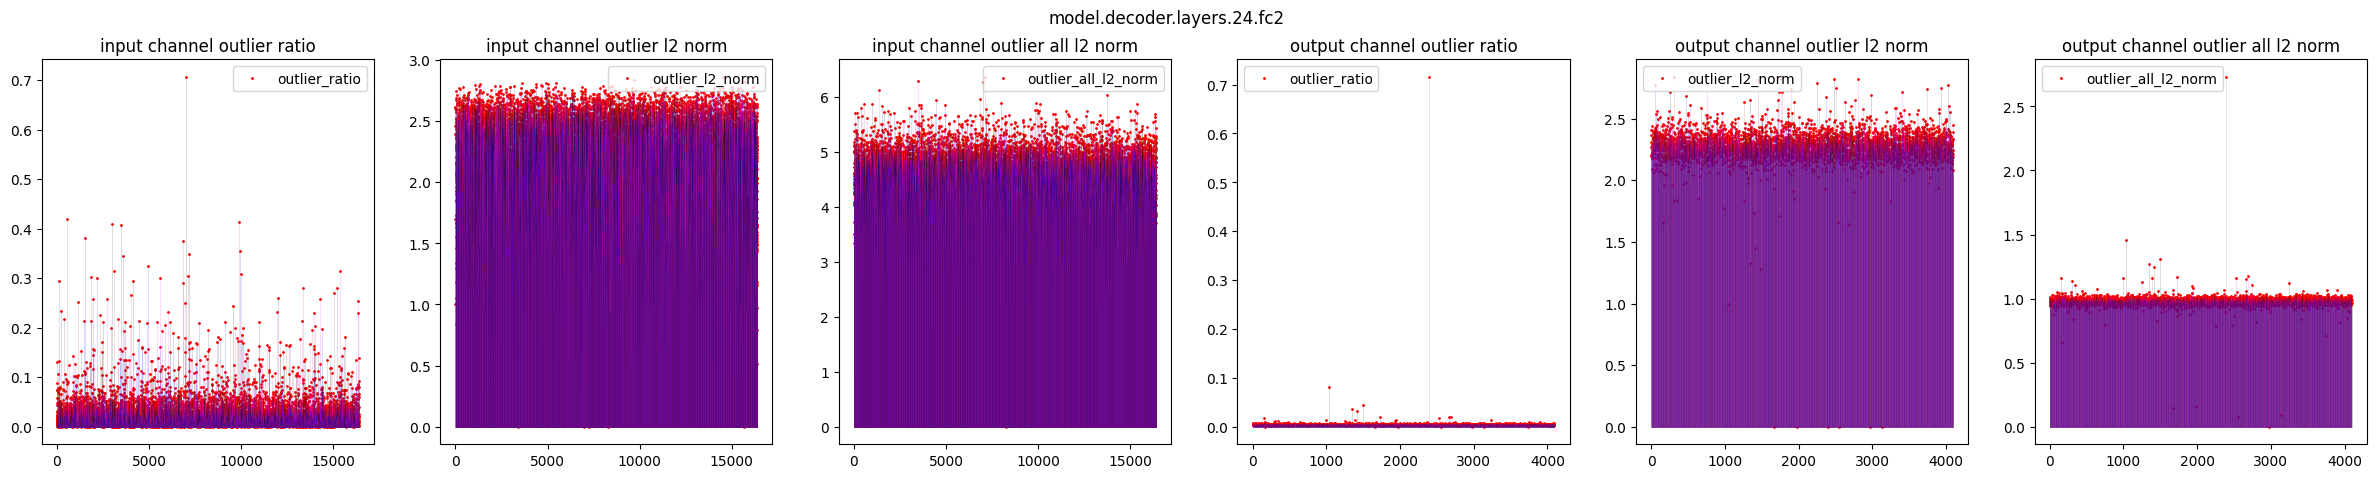

In [13]:
outlier_stats = torch.load('act_stats/opt-6.7b_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    # only examine layernorm
    if 'fc2' not in module_name:
        continue
    # check every 4 layers
    if int(module_name.split('.')[3]) % 8 != 0:
        continue

    plot_outlier_all_stats(layer_stats, module_name=module_name)

In [19]:
outlier_stats = torch.load('act_stats/llama-7b-meta_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    if int(module_name.split('.')[2]) % 8 > 0:
        break
    print(module_name)


model.layers.0.input_layernorm
model.layers.0.self_attn.q_proj
model.layers.0.self_attn.k_proj
model.layers.0.self_attn.v_proj
model.layers.0.self_attn.qkt_matmul
model.layers.0.self_attn.pv_matmul
model.layers.0.self_attn.o_proj
model.layers.0.post_attention_layernorm
model.layers.0.mlp.gate_proj
model.layers.0.mlp.up_proj
model.layers.0.mlp.down_proj


/tmp/ipykernel_7930/1678317626.py:19: RuntimeWarning: divide by zero encountered in log10
  outlier_stat = np.log10(outlier_stat)
/home/xuechenhao/anaconda3/envs/omniquant/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


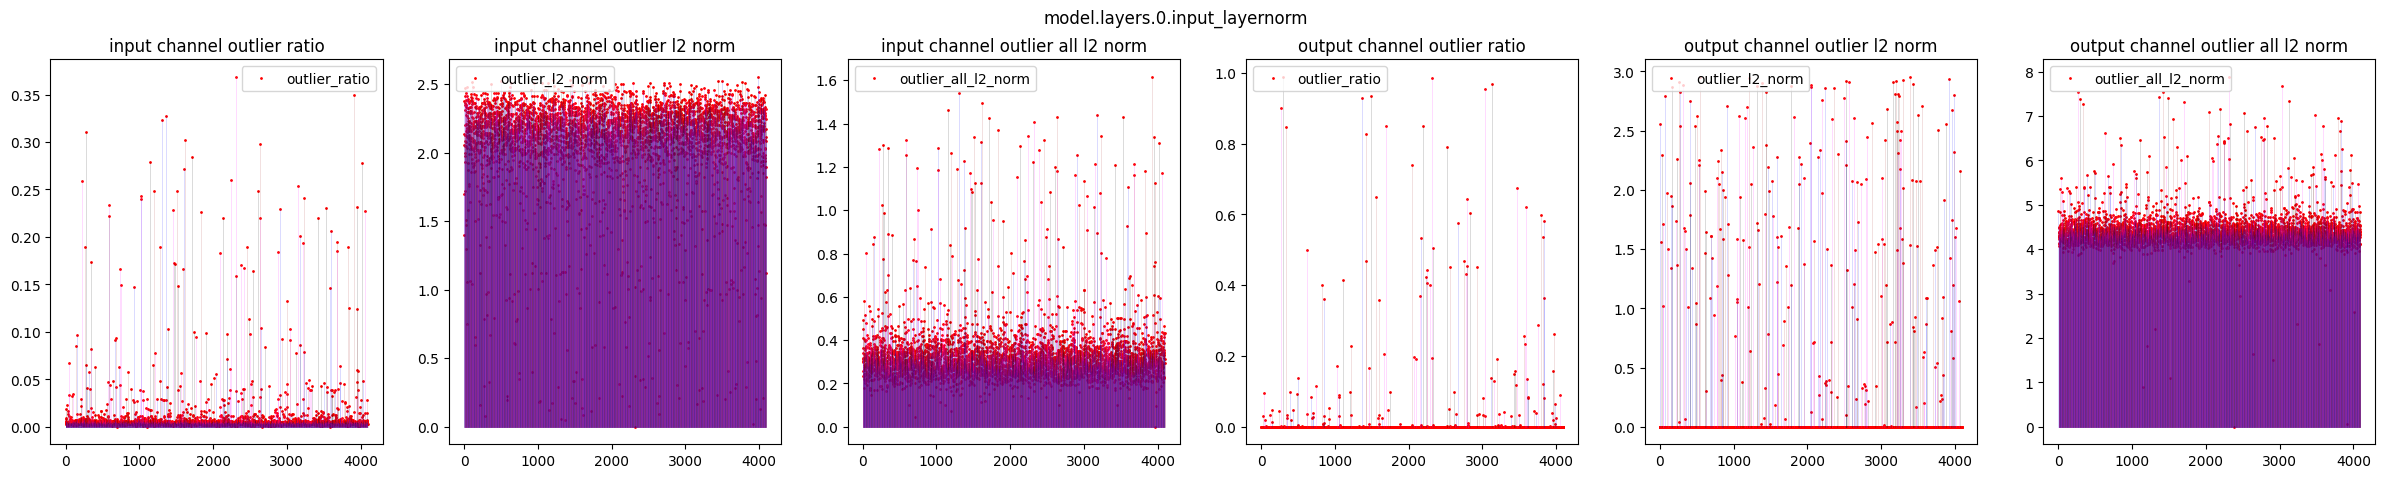

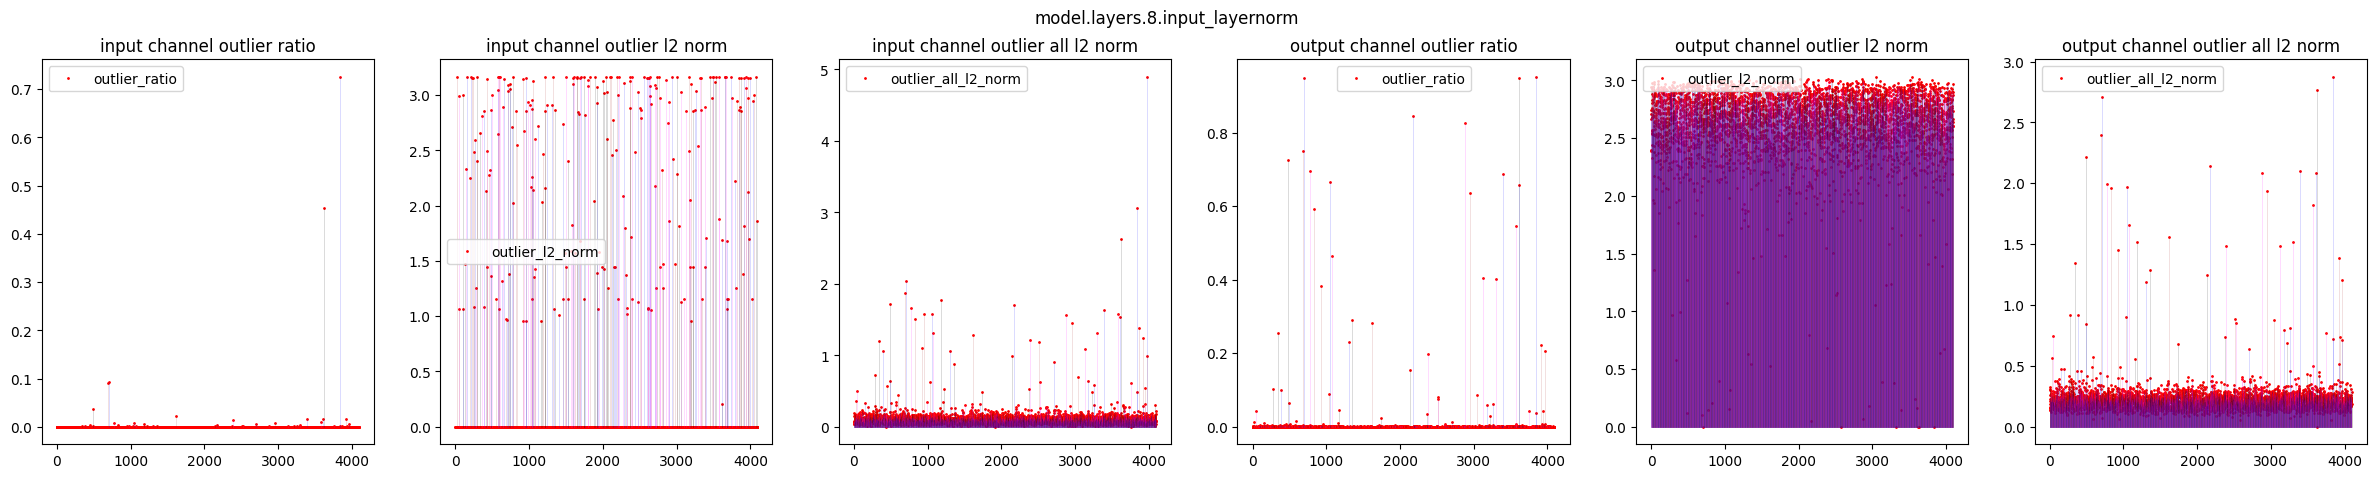

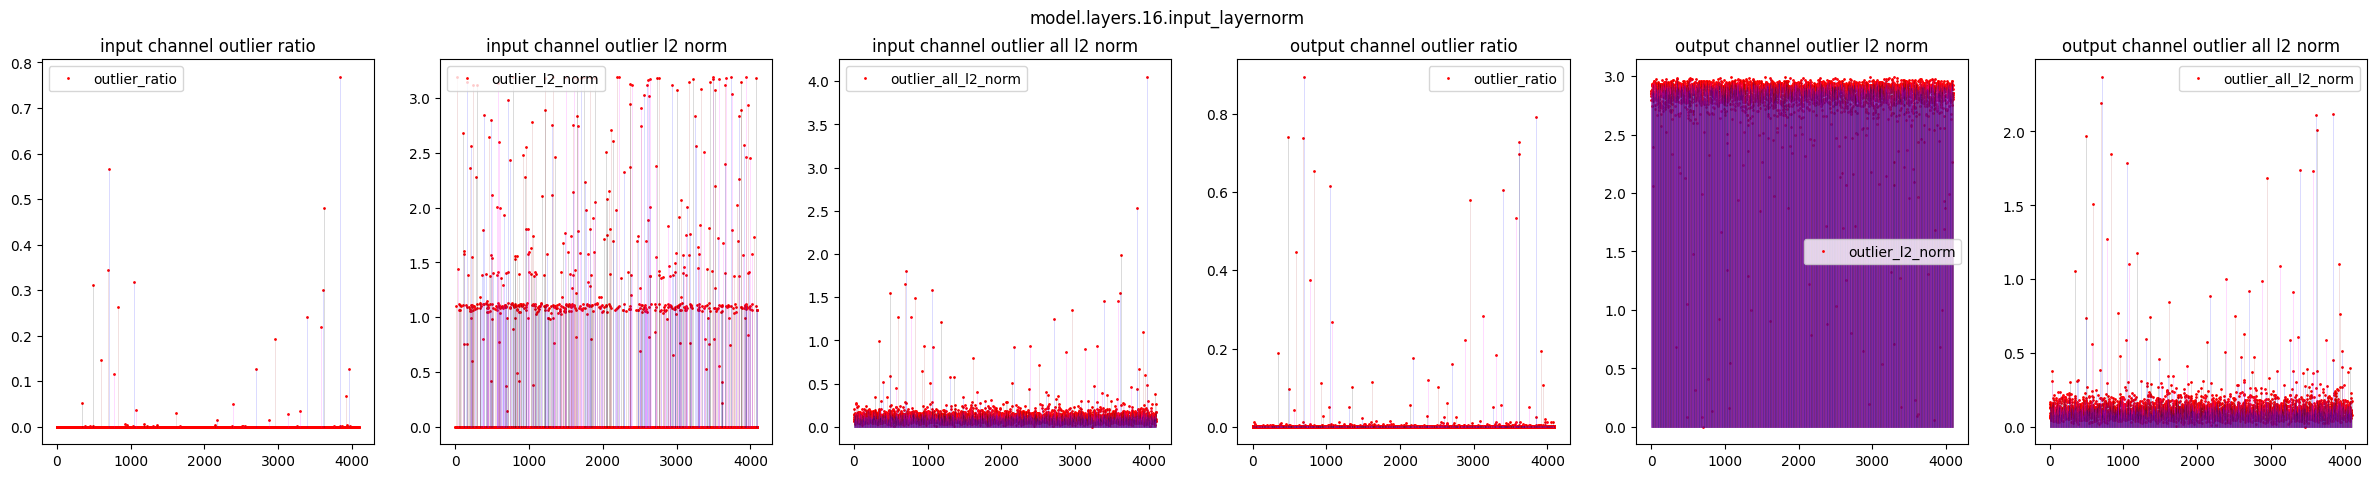

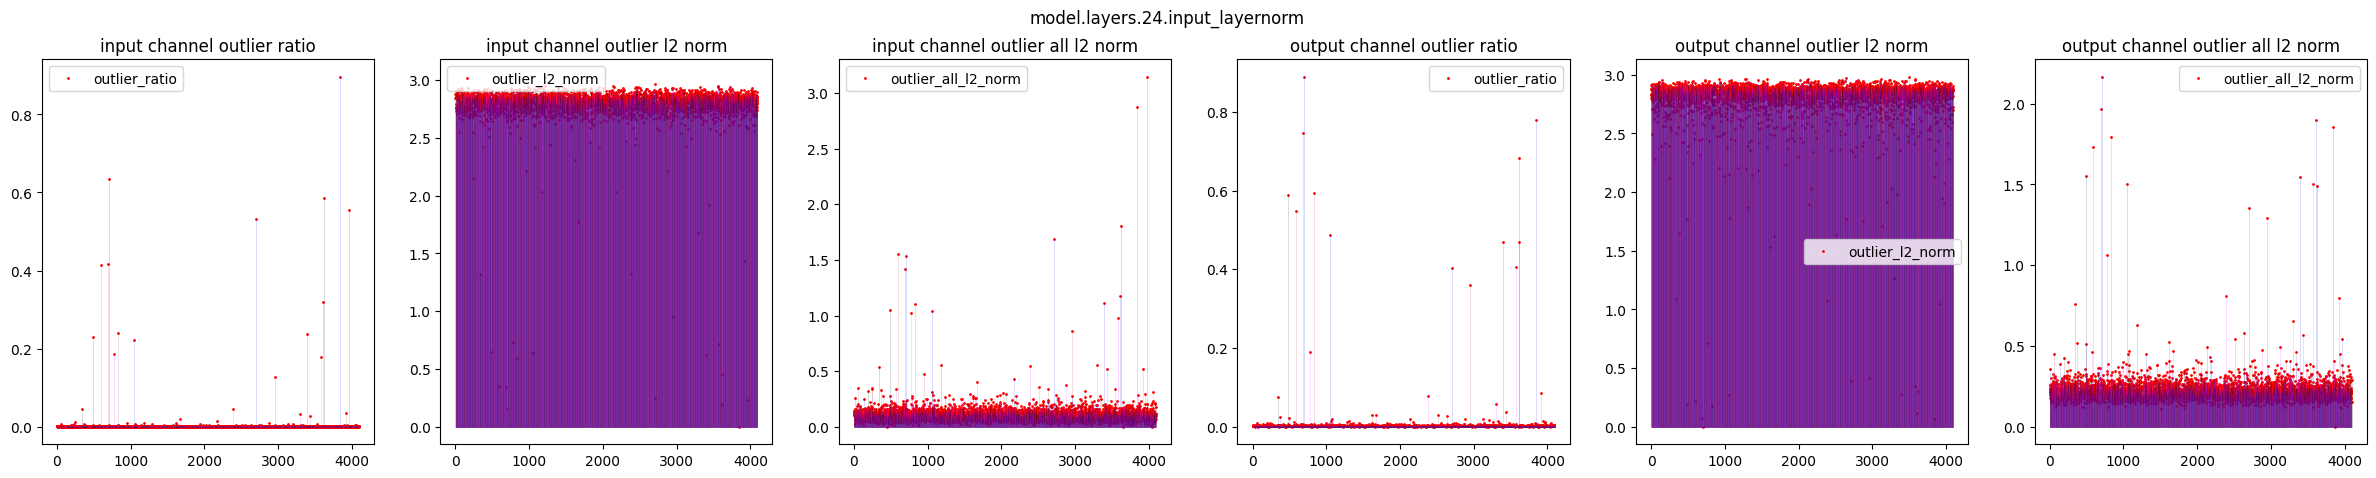

In [20]:
outlier_stats = torch.load('act_stats/llama-7b-meta_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    if 'input_layernorm' not in module_name:
        continue

    if int(module_name.split('.')[2]) % 8 != 0:
        continue

    plot_outlier_all_stats(layer_stats, module_name=module_name)


/tmp/ipykernel_7930/1678317626.py:19: RuntimeWarning: divide by zero encountered in log10
  outlier_stat = np.log10(outlier_stat)


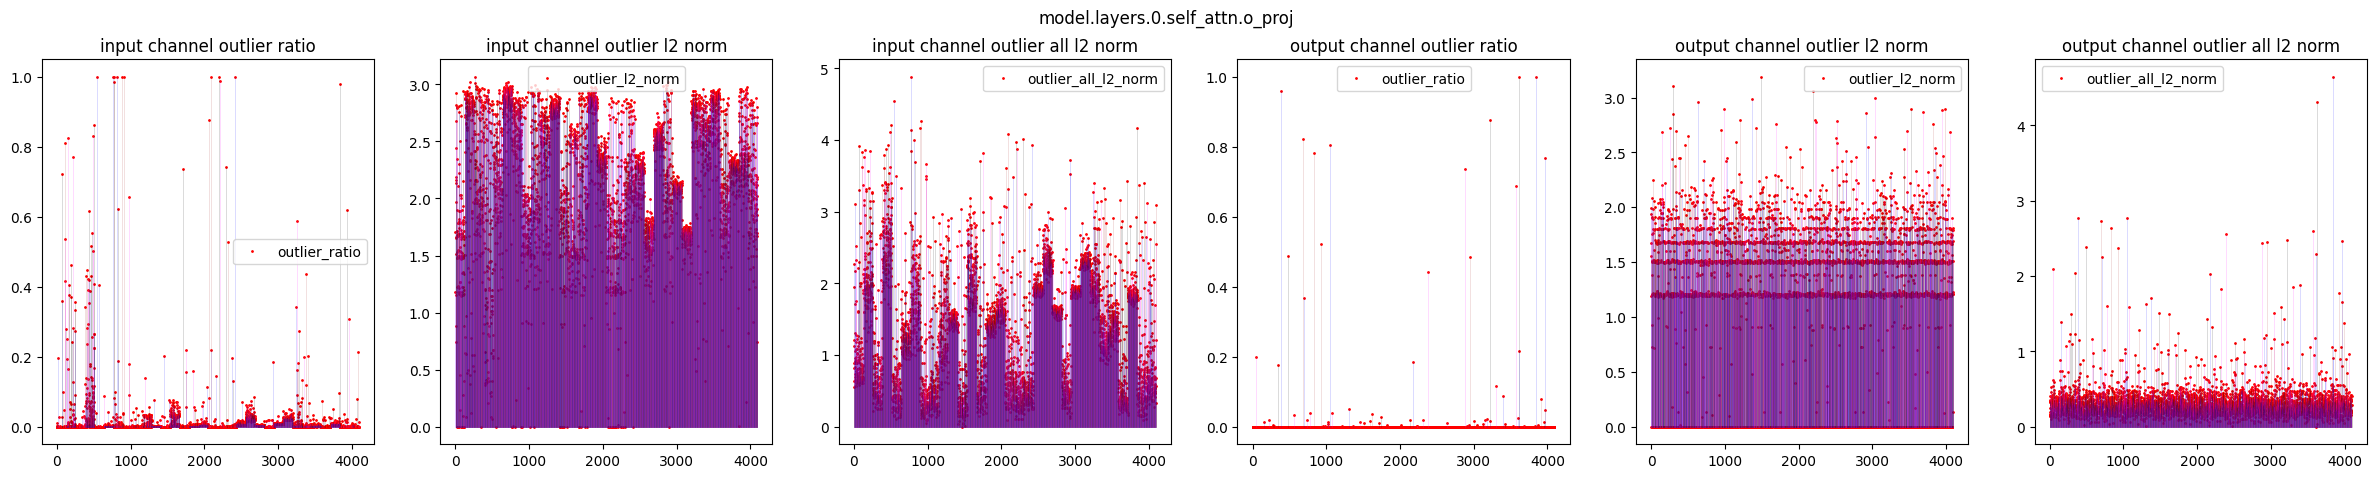

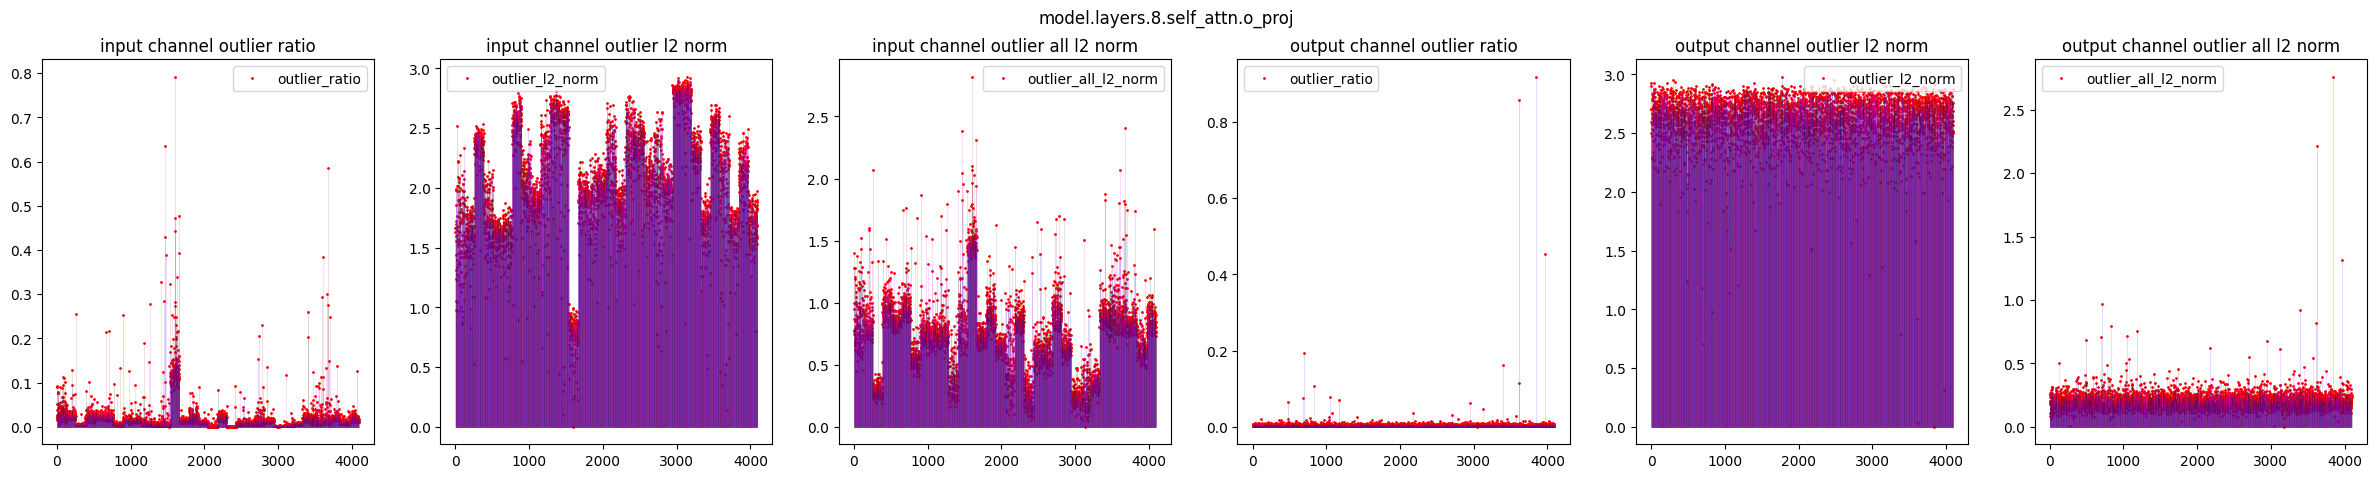

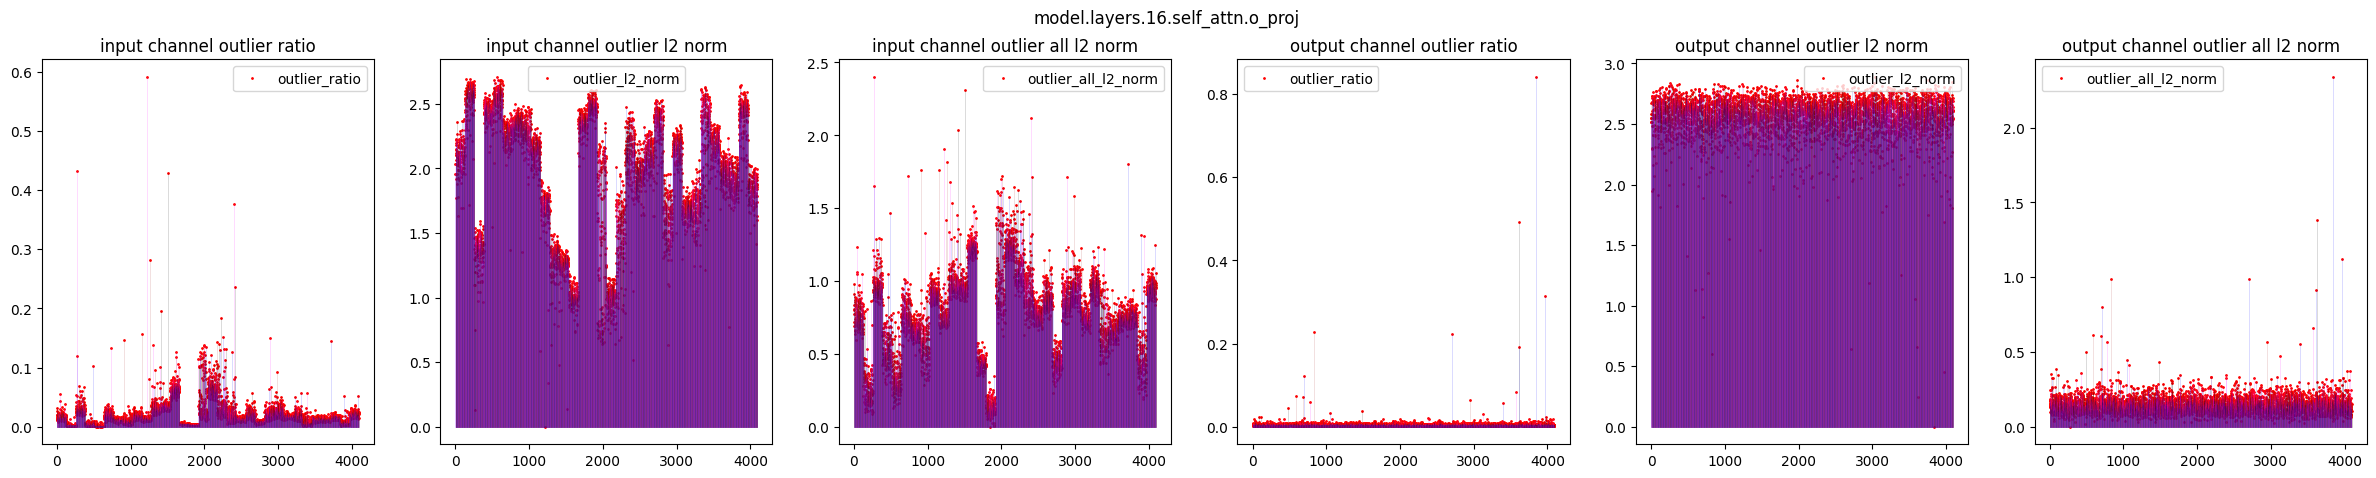

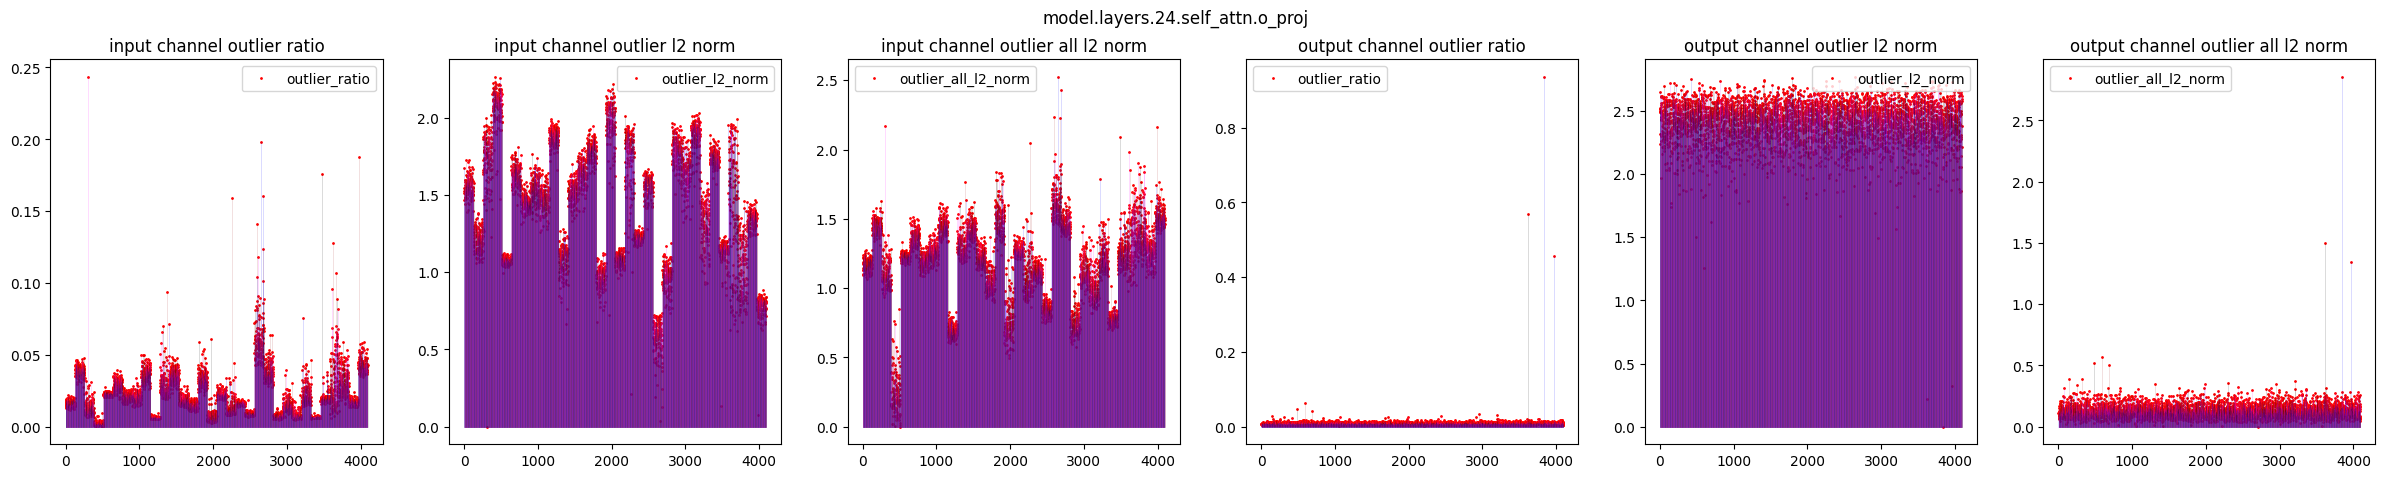

In [21]:
outlier_stats = torch.load('act_stats/llama-7b-meta_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    if 'o_proj' not in module_name:
        continue

    if int(module_name.split('.')[2]) % 8 != 0:
        continue

    plot_outlier_all_stats(layer_stats, module_name=module_name)

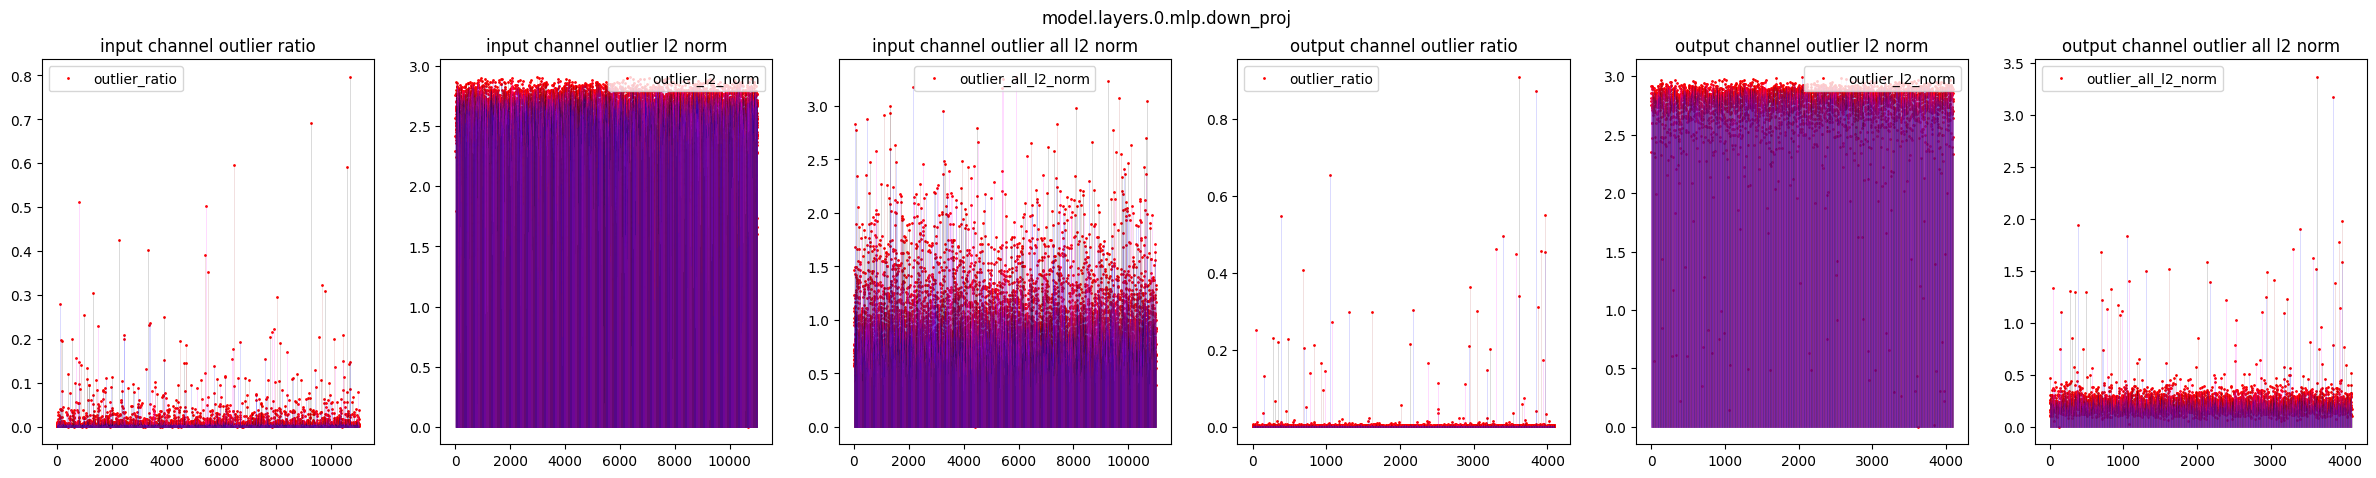

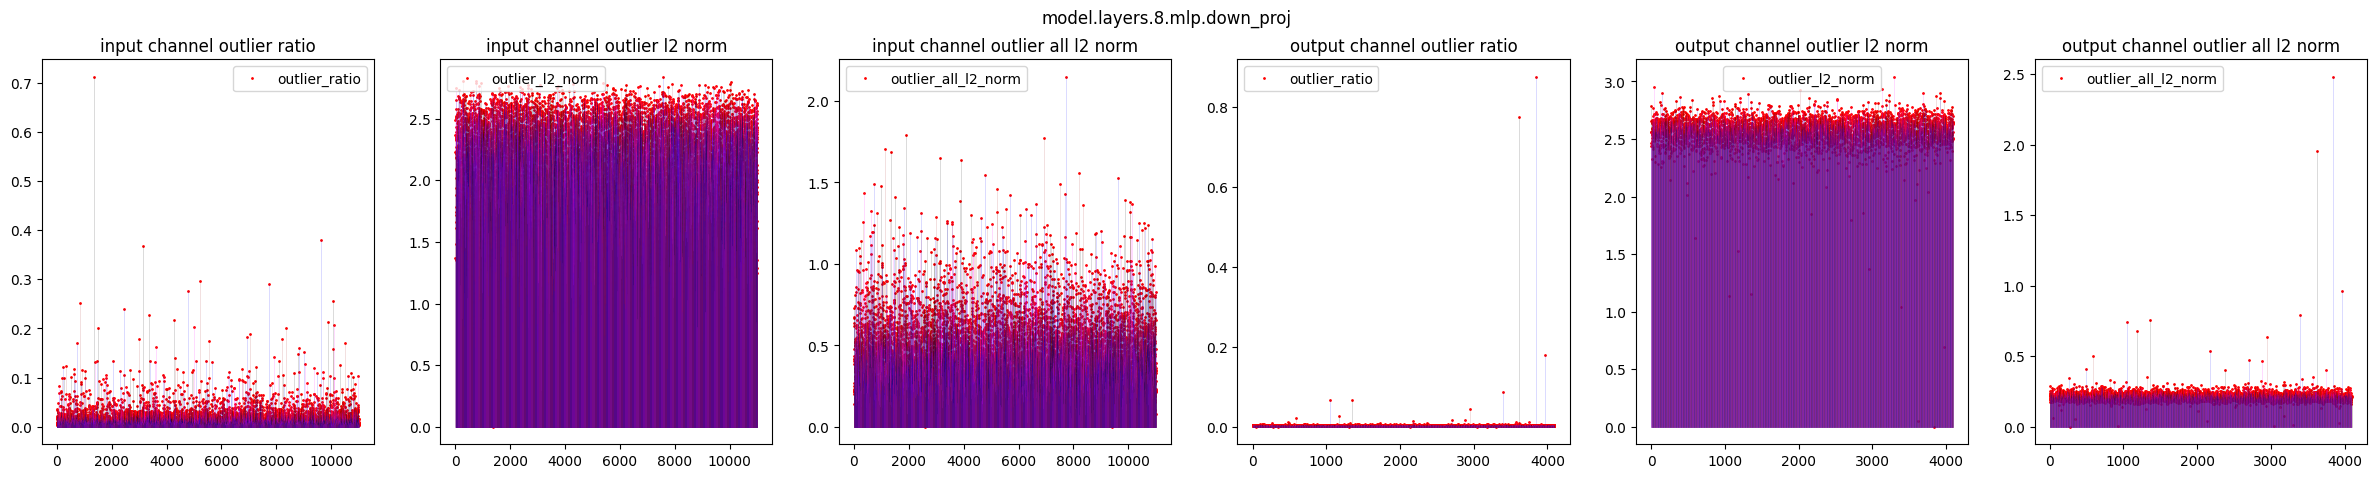

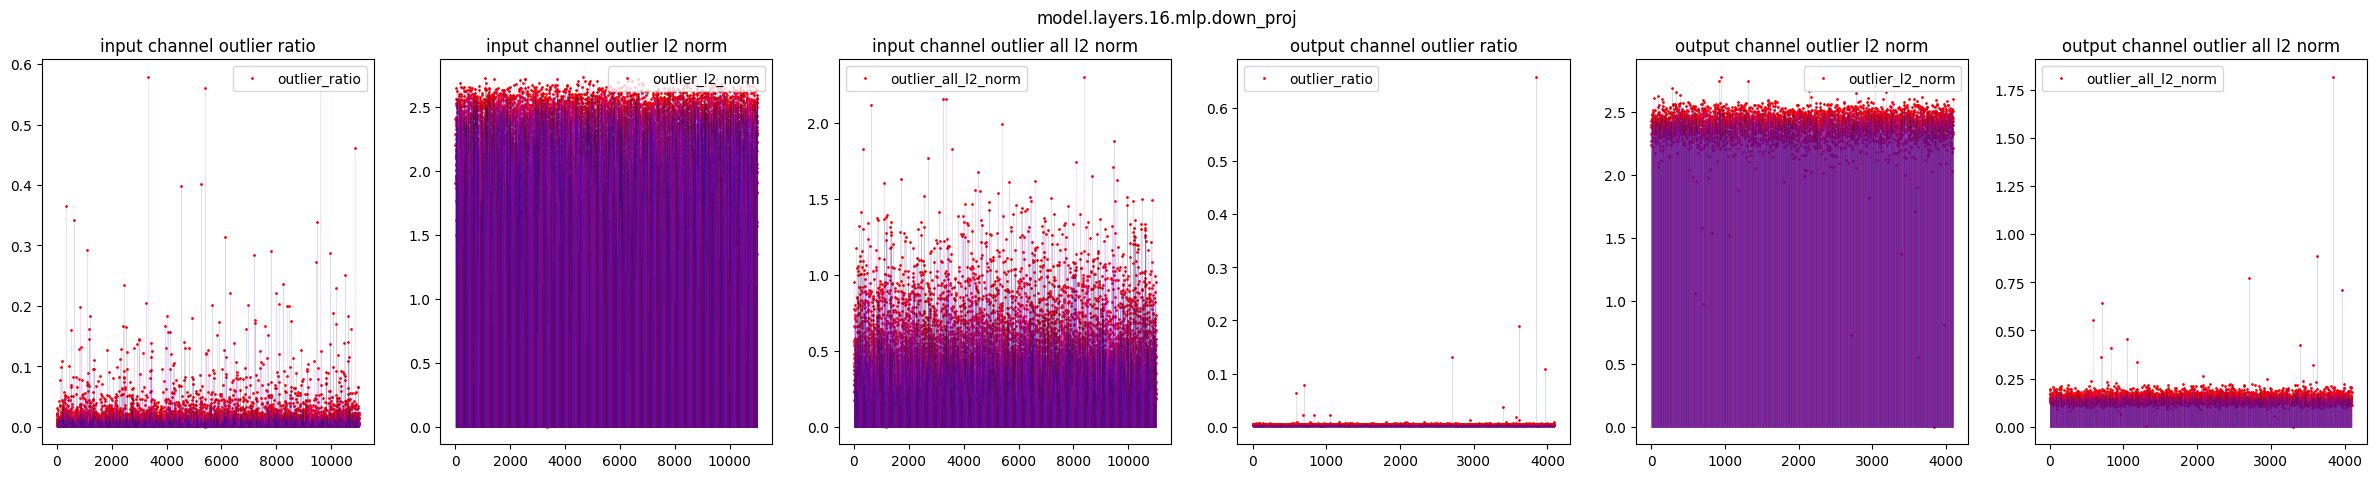

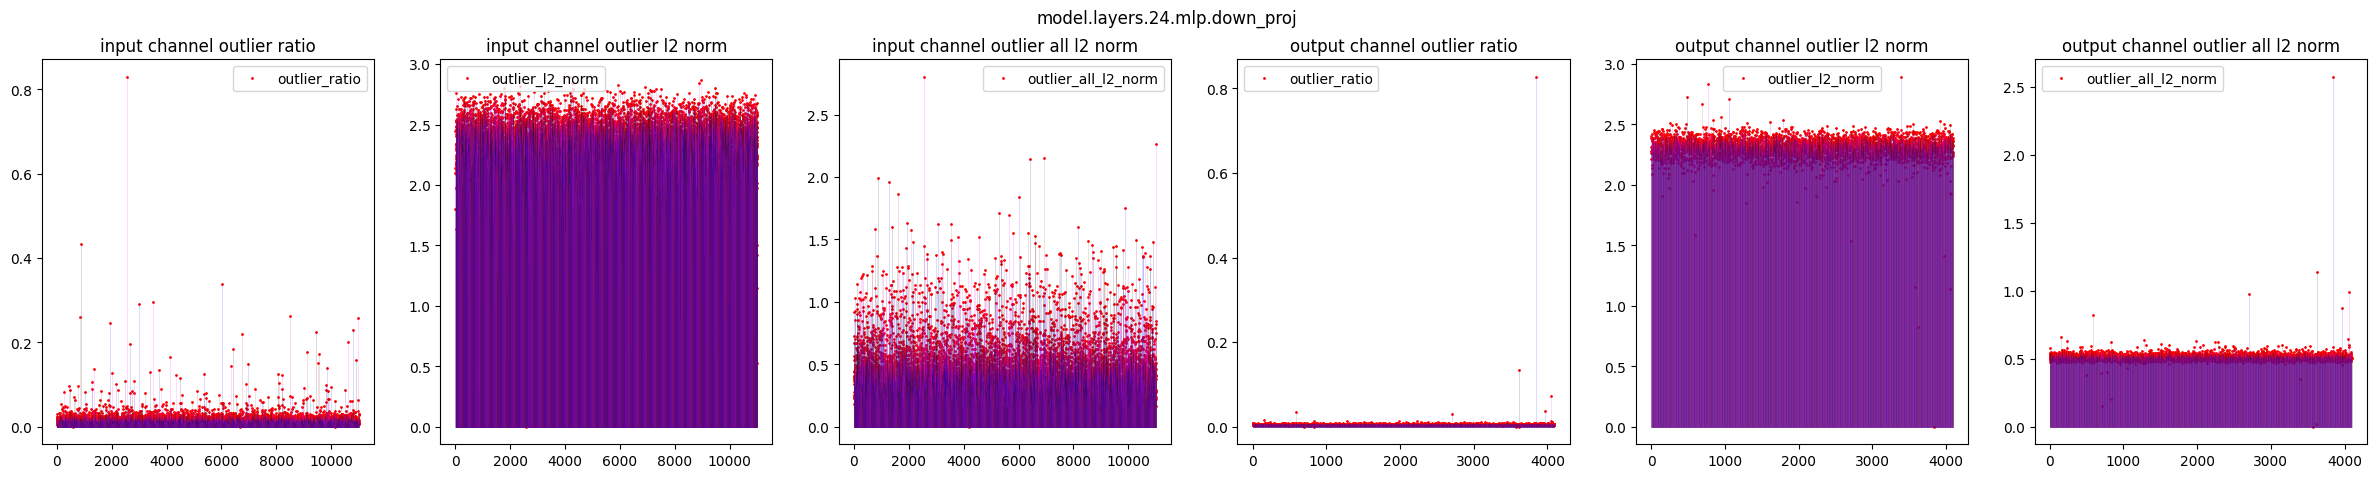

In [22]:
outlier_stats = torch.load('act_stats/llama-7b-meta_outlier.pt')

for module_name, layer_stats in outlier_stats.items():
    if 'down_proj' not in module_name:
        continue

    if int(module_name.split('.')[2]) % 8 != 0:
        continue

    plot_outlier_all_stats(layer_stats, module_name=module_name)